## Description:

This notebook performs the analysis and visualization of linguistic feature scores for BPD and control users. It compares group-level statistics, and results are visualized through histograms, scatter plots, and a summary comparison table.


## Clustering on raw scores

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:

model = SentenceTransformer('all-MiniLM-L6-v2')

df = pd.read_csv("/content/concatenated_posts_100_to_500.csv")
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)


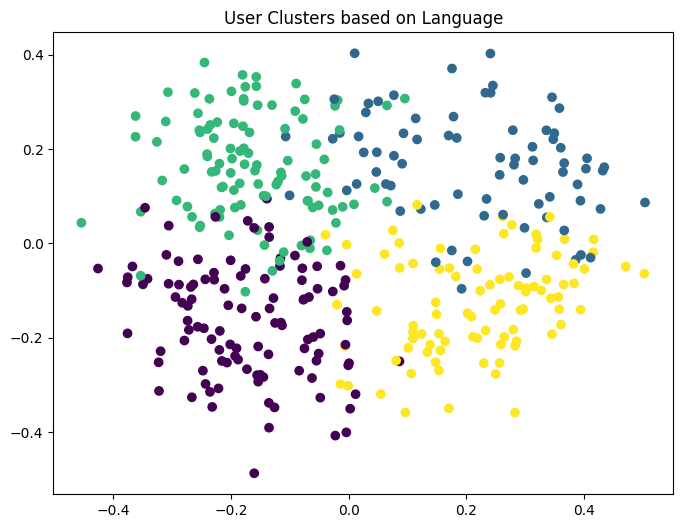

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df["cluster"])
plt.title("User Clusters based on Language")
plt.show()


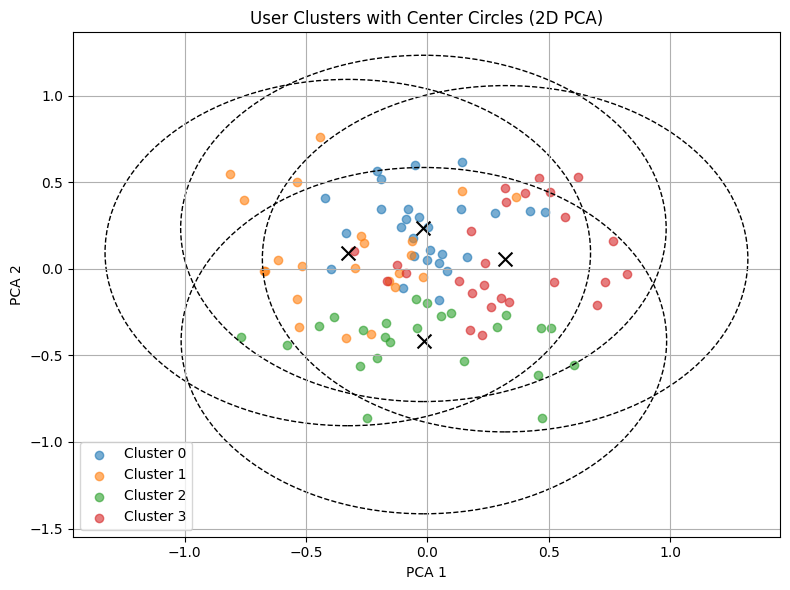

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- Simulate user embeddings (replace with your own embeddings) ---
np.random.seed(42)
embeddings = np.random.rand(100, 10)  # Replace with your real user embeddings

# --- KMeans clustering ---
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)
centers = kmeans.cluster_centers_

# --- Reduce dimensions to 2D for plotting ---
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
reduced_centers = pca.transform(centers)

# --- Plot clusters and circles around centers ---
plt.figure(figsize=(8, 6))

# Scatter user points
for cluster_id in np.unique(labels):
    cluster_points = reduced_embeddings[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.6)

# Mark centers and draw circles
for center in reduced_centers:
    plt.scatter(*center, color='black', marker='x', s=100)
    circle = plt.Circle(center, radius=1.0, color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.title("User Clusters with Center Circles (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualize Emotional Instability per User

In [ ]:
import pandas as pd

# Step 1: Define file paths
belief_path = "/content/user_sentiment_scores.csv"
emotion_path = "/content/emotion_instability_scores.csv"
contradiction_path = "/content/contradiction_scores.csv"
topic_path = "/content/bpd_topic_scores_topN.csv"

# Step 2: Read each file into a DataFrame
belief_df = pd.read_csv(belief_path)
emotion_df = pd.read_csv(emotion_path)
contradiction_df = pd.read_csv(contradiction_path)
topic_df = pd.read_csv(topic_path)

# Step 3: Merge them on 'user_id'
df_merged = belief_df.merge(emotion_df, on="user") \
                     .merge(contradiction_df, on="user") \
                     .merge(topic_df, on="user")

# Step 4: Preview the merged data
print(df_merged.head())

# Optional: Save to file
df_merged.to_csv("merged_bpd_scores.csv", index=False)


               user  avg_self_reflection_sentiment  emotion_instability_score  \
0         AHoneyman                      -0.427834                   0.714286   
1      AdeptAnxiety                      -0.376798                   0.647059   
2         Adnamaeel                      -0.029161                   0.700000   
3  Amity_Affliction                      -0.426174                   0.605263   
4            AmyAyn                      -0.407768                   0.833333   

   contradiction_score  bpd_topic_score  
0             0.095238         0.219895  
1             0.117647         0.063830  
2             0.400000         0.017544  
3             0.263158         0.160000  
4             0.333333         0.132353  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize all four scores to [0, 1]
features = ['avg_self_reflection_sentiment', 'emotion_instability_score', 'contradiction_score', 'bpd_topic_score']
scaler = MinMaxScaler()
df_normalized = df_merged.copy()
df_normalized[features] = scaler.fit_transform(df_merged[features])

# Compute average or weighted sum
# Example: equal weight
df_normalized["final_score"] = df_normalized[features].mean(axis=1)

# Optional: round or scale to 0–100
df_normalized["final_score"] = (df_normalized["final_score"] * 100).round(1)
df_normalized.to_csv("normalized_bpd_scores.csv", index=False)


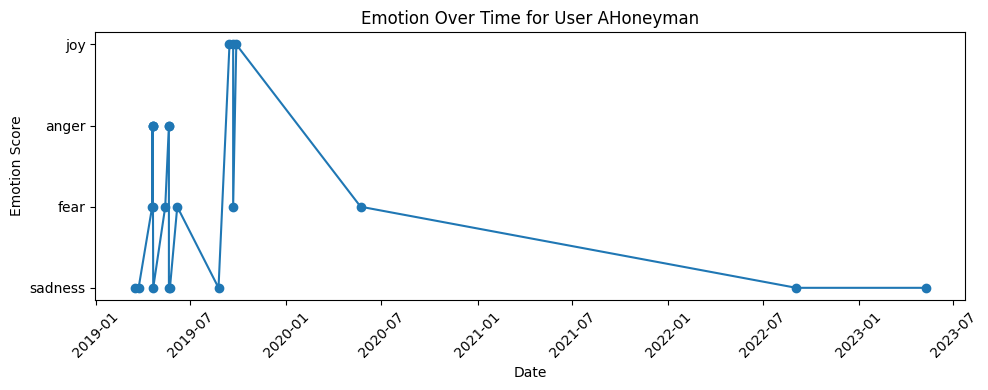

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/content/user_selfbelief_emotion_contradiction.csv')

# Convert date to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])

# Sort by date
df = df.sort_values(by=['user', 'date_posted'])

# Example: plot emotion score over time for one user
user_id = df['user'].unique()[0]  # Pick one for demo
user_df = df[df['user'] == user_id]

plt.figure(figsize=(10, 4))
plt.plot(user_df['date_posted'], user_df['emotion'], marker='o')
plt.title(f'Emotion Over Time for User {user_id}')
plt.xlabel('Date')
plt.ylabel('Emotion Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Emotional Instability Heatmap over time

In [ ]:
# Make sure date_posted is datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Filter for dates after Jan 1, 2016
df = df[df['date_posted'] >= pd.Timestamp('2020-01-01')]

df['week'] = df['date_posted'].dt.to_period('W').dt.start_time


<ipython-input-12-fdad76d071a4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['date_posted'].dt.to_period('W').dt.start_time


In [ ]:
emotion_map = {
    'joy': 0.8,
    'neutral': 0.0,
    'anger': -0.7,
    'sadness': -0.6,
    'fear': -0.5,
    'surprise': 0.5,
    'disgust': -0.8,
    # customize these!
}

df['emotion_score'] = df['emotion'].map(emotion_map)
# Use emotion_score instead of raw emotion
df['emotion_score'] = pd.to_numeric(df['emotion_score'], errors='coerce')


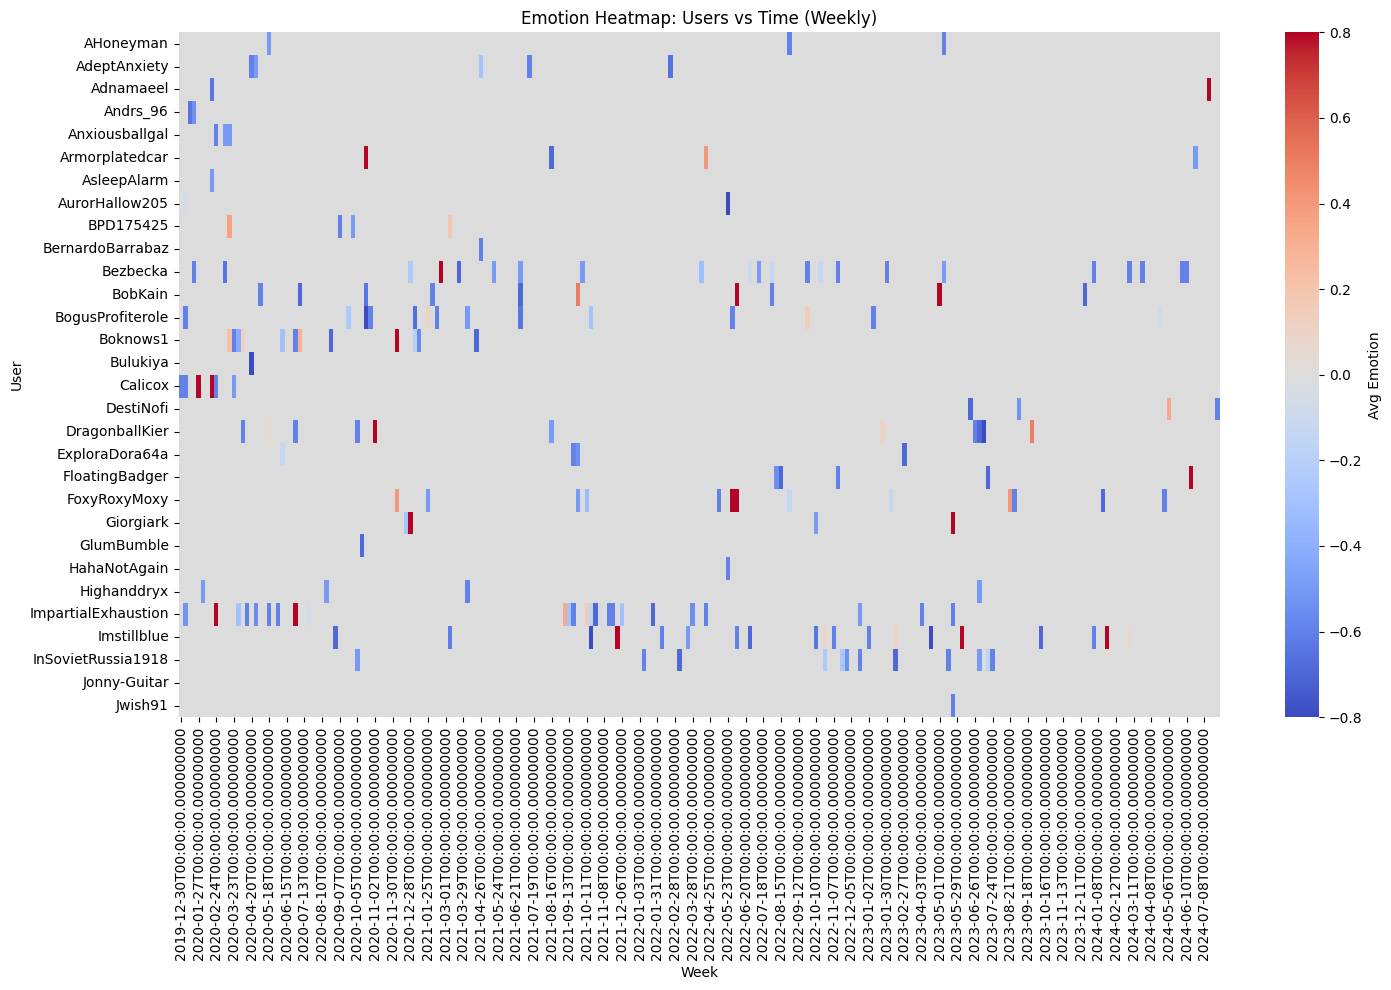

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Average emotion per user per week
heatmap_data = df.groupby(['user', 'week'])['emotion_score'].mean().unstack(fill_value=0)

# Optional: limit to top 30 users
heatmap_data = heatmap_data.loc[heatmap_data.index[:30]]

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Avg Emotion'})
plt.title("Emotion Heatmap: Users vs Time (Weekly)")
plt.ylabel("User")
plt.xlabel("Week")
plt.tight_layout()
plt.show()

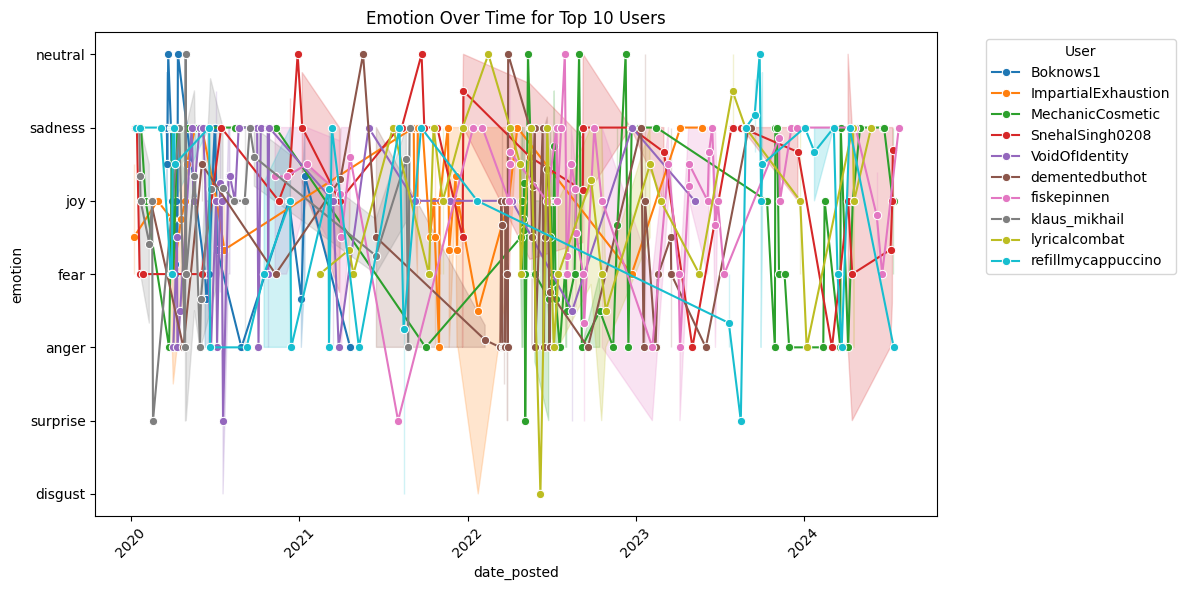

In [ ]:
top_users = df['user'].value_counts().head(10).index
subset = df[df['user'].isin(top_users)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='date_posted', y='emotion', hue='user', marker='o')
plt.title("Emotion Over Time for Top 10 Users")
plt.xticks(rotation=45)
plt.legend(title='User', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


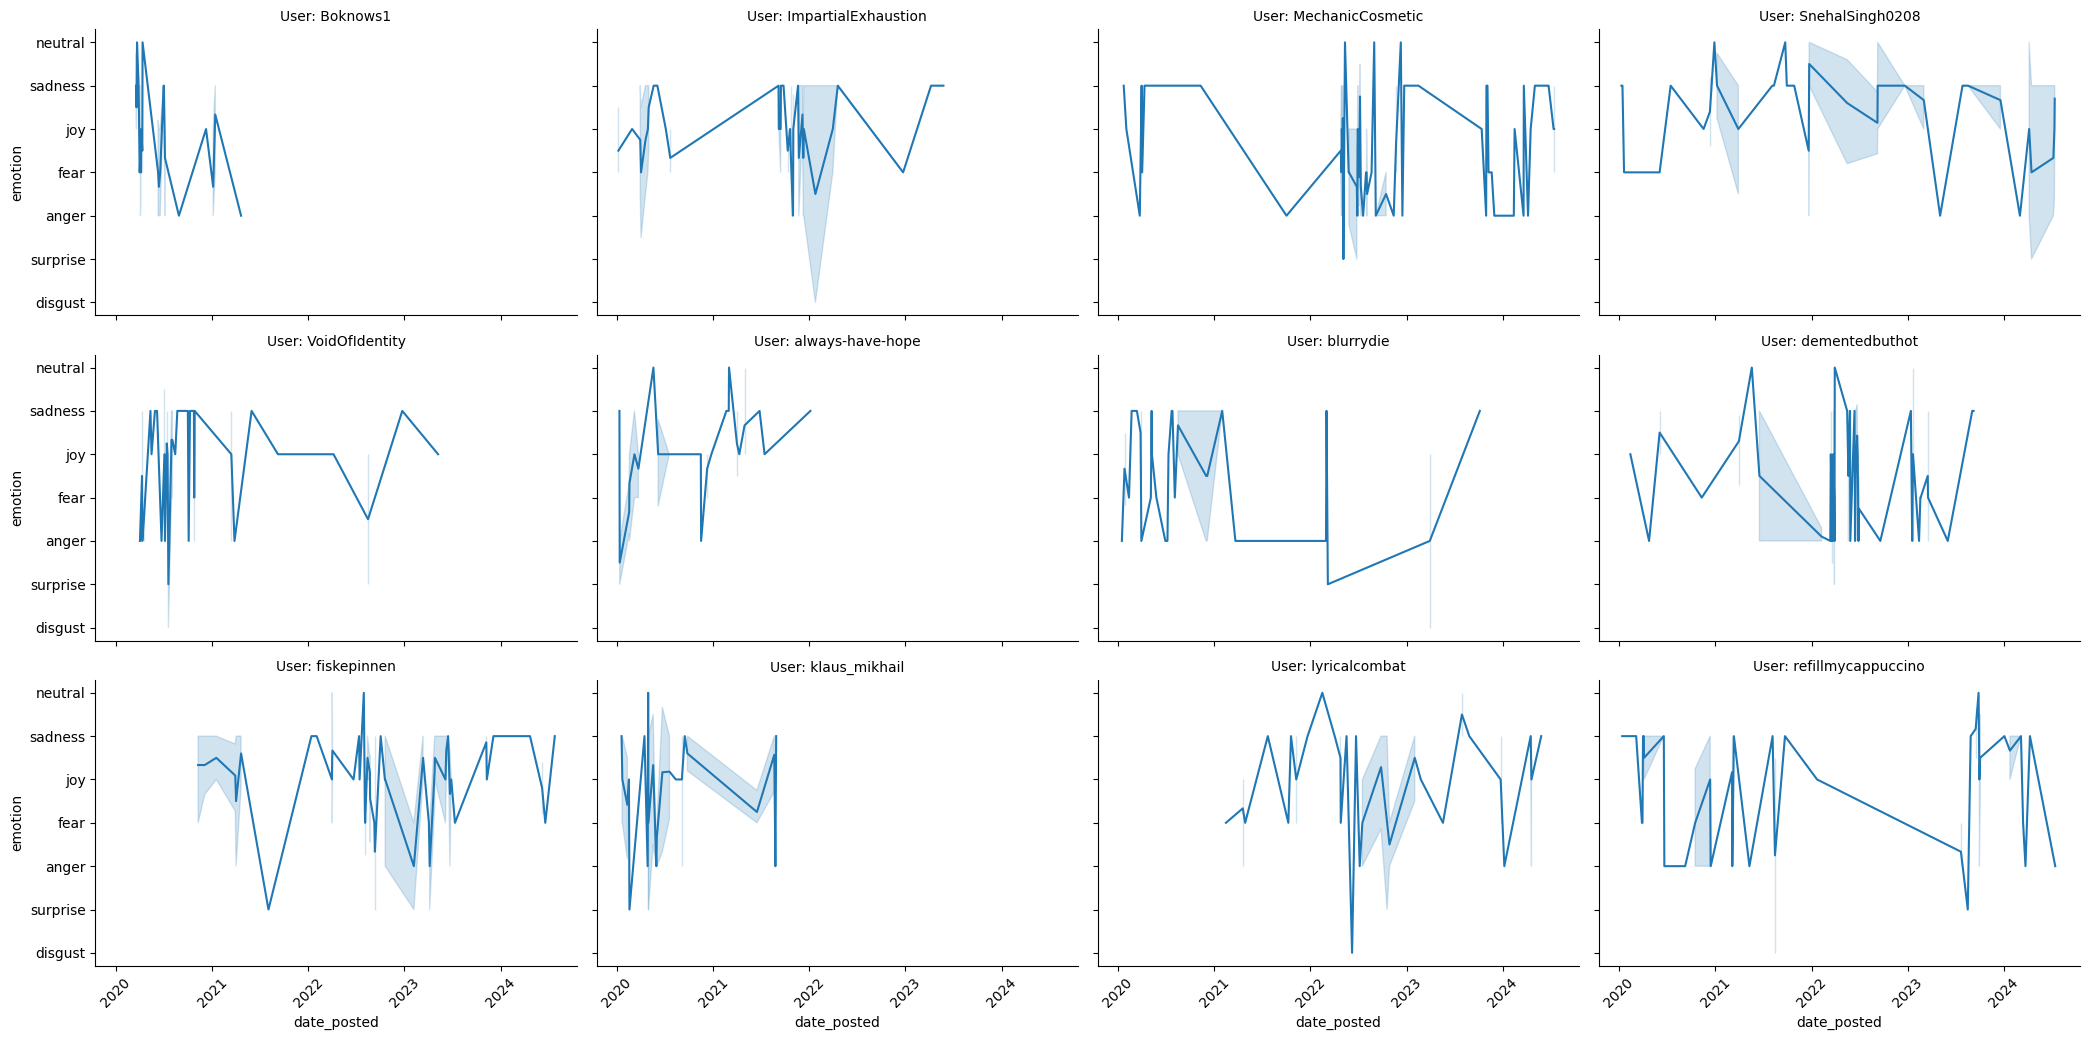

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top N users by post count (e.g., 12 users)
top_users = df['user'].value_counts().head(12).index
subset = df[df['user'].isin(top_users)].copy()
subset = subset.sort_values(['user', 'date_posted'])

# Create FacetGrid
g = sns.FacetGrid(subset, col="user", col_wrap=4, height=3.5, aspect=1.5, sharey=True)
g.map_dataframe(sns.lineplot, x='date_posted', y='emotion')
g.set_titles(col_template="User: {col_name}")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()


## Compute Weighted Avg score + Comparison BPD vs Control group


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data (assumes comma-separated files now)
bpd_df = pd.read_csv("BPD_scores.csv")
control_df = pd.read_csv("CONTROL_scores.csv")

# Add group label
bpd_df['group'] = 'BPD'
control_df['group'] = 'Control'

# Combine for normalization
df = pd.concat([bpd_df, control_df], ignore_index=True)

bpd_df['avg_self_reflection_sentiment_inverted'] = 1 - bpd_df['avg_self_reflection_sentiment']
control_df['avg_self_reflection_sentiment_inverted'] = 1 - control_df['avg_self_reflection_sentiment']


# Features to normalize and use in weighted score
weights = {
    'avg_self_reflection_sentiment': 0.3,
    'emotion_instability_score': 0.2,
    'contradiction_score': 0.2,
    'bpd_topic_score': 0.3
}

features = list(weights.keys())

# Normalize
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features] = scaler.fit_transform(df[features])

# Compute weighted_score
df_normalized["weighted_score"] = sum(df_normalized[f] * w for f, w in weights.items())

# Optional: preview
print(df_normalized[["user", "group", "weighted_score"]].head())


               user group  weighted_score
0         AHoneyman   BPD        0.351758
1      AdeptAnxiety   BPD        0.291624
2         Adnamaeel   BPD        0.471123
3  Amity_Affliction   BPD        0.348996
4            AmyAyn   BPD        0.433646


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


features = list(weights.keys())

def classify_risk(score):
    if score >= 0.66:
        return "High"
    elif score >= 0.33:
        return "Medium"
    else:
        return "Low"

df_normalized["risk_level"] = df_normalized["weighted_score"].apply(classify_risk)

# Step 8: Statistical comparison
results = []
for f in features + ['weighted_score']:
    bpd_vals = df_normalized[df_normalized['group'] == 'BPD'][f]
    control_vals = df_normalized[df_normalized['group'] == 'Control'][f]
    stat, pval = stats.ttest_ind(bpd_vals, control_vals, equal_var=False)
    results.append({
        "Metric": f,
        "BPD Mean": round(bpd_vals.mean(), 3),
        "Control Mean": round(control_vals.mean(), 3),
        "p-value": round(pval, 4)
    })

summary_df = pd.DataFrame(results)
print("\n Statistical Comparison:")
print(summary_df)

# Step 9: Risk level breakdown
risk_counts = df_normalized.groupby(['group', 'risk_level']).size().unstack(fill_value=0)
risk_percent = (risk_counts.T / risk_counts.T.sum()).T * 100
print("\n Risk Level Distribution (%):")
print(risk_percent.round(1))



 Statistical Comparison:
                          Metric  BPD Mean  Control Mean  p-value
0  avg_self_reflection_sentiment     0.397         0.416   0.2944
1      emotion_instability_score     0.566         0.771   0.0000
2            contradiction_score     0.341         0.396   0.0145
3                bpd_topic_score     0.287         0.033   0.0000
4                 weighted_score     0.387         0.368   0.0298

 Risk Level Distribution (%):
risk_level  High   Low  Medium
group                         
BPD          0.8  28.4    70.8
Control      0.5  36.7    62.8


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Features to compare
features = [
    'avg_self_reflection_sentiment',
    'emotion_instability_score',
    'contradiction_score',
    'bpd_topic_score',
    'weighted_score'
]

summary = []

for metric in features:
    bpd_vals = df_normalized[df_normalized['group'] == 'BPD'][metric]
    ctrl_vals = df_normalized[df_normalized['group'] == 'Control'][metric]

    bpd_mean = round(bpd_vals.mean(), 3)
    ctrl_mean = round(ctrl_vals.mean(), 3)
    pval = ttest_ind(bpd_vals, ctrl_vals, equal_var=False).pvalue

    if metric == 'avg_self_reflection_sentiment':
        interpretation = "↑ BPD" if bpd_mean < ctrl_mean else "↓ BPD"
        display_name = "avg Self Reflection Sentiment"
    else:
        interpretation = "↑ BPD" if bpd_mean > ctrl_mean else "↓ BPD"
        display_name = metric.replace('_', ' ').title()

    summary.append({
        'Metric': metric.replace('_', ' ').title(),
        'BPD Mean': bpd_mean,
        'Control Mean': ctrl_mean,
        'p-value': "<0.001" if pval < 0.001 else round(pval, 4),
        'Interpretation': interpretation
    })

summary_df = pd.DataFrame(summary)
print(summary_df)


                          Metric  BPD Mean  Control Mean p-value  \
0  Avg Self Reflection Sentiment     0.397         0.416  0.2944   
1      Emotion Instability Score     0.566         0.771  <0.001   
2            Contradiction Score     0.341         0.396  0.0145   
3                Bpd Topic Score     0.287         0.033  <0.001   
4                 Weighted Score     0.387         0.368  0.0298   

  Interpretation  
0          ↑ BPD  
1          ↓ BPD  
2          ↓ BPD  
3          ↑ BPD  
4          ↑ BPD  
